# OLS example

This is a brief example on using the stats models OLS function with patsy formulas.

In [128]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import scipy as sp

## Create Example Datasets
First I simulate a simple example dataset. You can probably ignore this since you have real data :)

In [129]:
# Create some example data
cs= [12, 14, 16, 18]  # classes of carbons
ds = [0, 1, 2, 3]     # classes of double bonds

df = pd.DataFrame({'RT': np.random.uniform(low=0.1, high=15, size=1000), 'Carbon': np.random.choice(cs, size=1000), 'DB': np.random.choice(ds, size=1000)})
df.head()

,Carbon,DB,RT
0,14,2,8.235257
1,12,2,11.365186
2,16,2,9.155146
3,12,1,6.745507
4,14,3,12.448401


## Create OLS output

Now I use stats models to generate OLS output.

In [130]:
# Write out my R-style formula
formula = 'RT ~ C(Carbon) + C(DB)'

# Generate a model using the formula and dataframe. This steps builds all of the matrices needed for OLS.
model = smf.ols(formula, df)

# Fit the model and get the results output
results = model.fit()

# Print an overall summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RT   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.362
Date:                Fri, 12 Jun 2015   Prob (F-statistic):              0.227
Time:                        18:46:06   Log-Likelihood:                -2879.7
No. Observations:                1000   AIC:                             5773.
Df Residuals:                     993   BIC:                             5808.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           6.9803      0.357     19.564      0.000         6.280     7.680
C(Carbon)[T.14]     0.7920      0.385      2.058      0.040         0.037     1.547
C(Carbon)[T.16]     0.7545      0.386      1.952      0.051        -0.004     1.513
C(Carbon)[T.18]     0.3991      0.387      1.032      0.302        -0.360     1.158
C(DB)[T.1]         -0.1977      0.394     -0.502      0.616        -0.971     0.576
C(DB)[T.2]         -0.0637      0.380     -0.168      0.867        -0.809     0.682
C(DB)[T.3]         -0.5961      0.387     -1.542      0.123        -1.355     0.162
==============================================================================
Omnibus:                      815.571   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.378
Skew:                           0.113   Prob(JB):                     1.73e-14
Kurtosis:                       1.788   Cond. No.                         5.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Access results attributes

The results object now holds all of the attributes related to the OLS output. For a description of output see description of the regression results class:

http://statsmodels.sourceforge.net/0.5.0/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In python you can look at an objects attributes and methods using the `dir` function.

In [131]:
# Only showing the first 5 to keep things short
dir(results)[:5]

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM']

There are two $R^2$ values that you can get from these results: `rsquared` and `rsquared_adj`. To get the rsquared value you can do:

In [132]:
rSquared = results.rsquared
print rSquared

0.00816199611941


## Get influence measures

Get the various influence statistics and intervals. There is a handy module called **summary_table** that will pull everything together for us.

In [133]:
from statsmodels.stats.outliers_influence import summary_table

Summary table outputs 3 different datasets:

* st -> is a statsmodels table, it just makes a pretty table when output
* data -> is all of the data that you see in st
* header -> is all of the headings that you see

In [134]:
# Use summary table to pull of the stats that we need
st, data, header = summary_table(results, alpha=0.05)

For our sanity it will help to map a short header name with the column number. I just print out the header and make a dictionary relating a short version of the header with the column number. You don't really need to do this, but it makes things a little cleaner.

In [135]:
header

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [136]:
head2index = {
    'obs': 0,
    'dep': 1,
    'pred': 2,
    'SEpred': 3,
    'CIlow': 4,
    'CIhi': 5,
    'PIlow': 6,
    'PIhi': 7,
    'residual': 8,
    'SEres': 9,
    'student': 10,
    'cooksd': 11
}

Notice there is no DFFITs, I use a different method below to handle this. **Warning: I sort these results, so they show up as straight lines in the figure. Try it without sorting first**

In [137]:
# Get fitted values
fittedvalues = np.sort(data[:, head2index['pred']])

# Get Upper and lower Predictition Intervals
predHi = np.sort(data[:, head2index['PIhi']])
predLow = np.sort(data[:, head2index['PIlow']])
# I think thse are the same as those output by
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# wls_prediction_std(results)
# but need to double check

# Get upper and lower Confidence Intervals
ciHi = np.sort(data[:, head2index['CIhi']])
ciLow = np.sort(data[:, head2index['CIlow']])

# Get Cook's D
cooks = data[:, head2index['cooksd']]

### Make a plot with prediction intervals

In [138]:
# Import plotting library
import matplotlib.pyplot as plt

# Ignore this command, it allows inline plotting in ipython
%matplotlib inline

In [139]:
# Get original data values
x = df.index.values
y = df['RT'].values

(0, 1000)

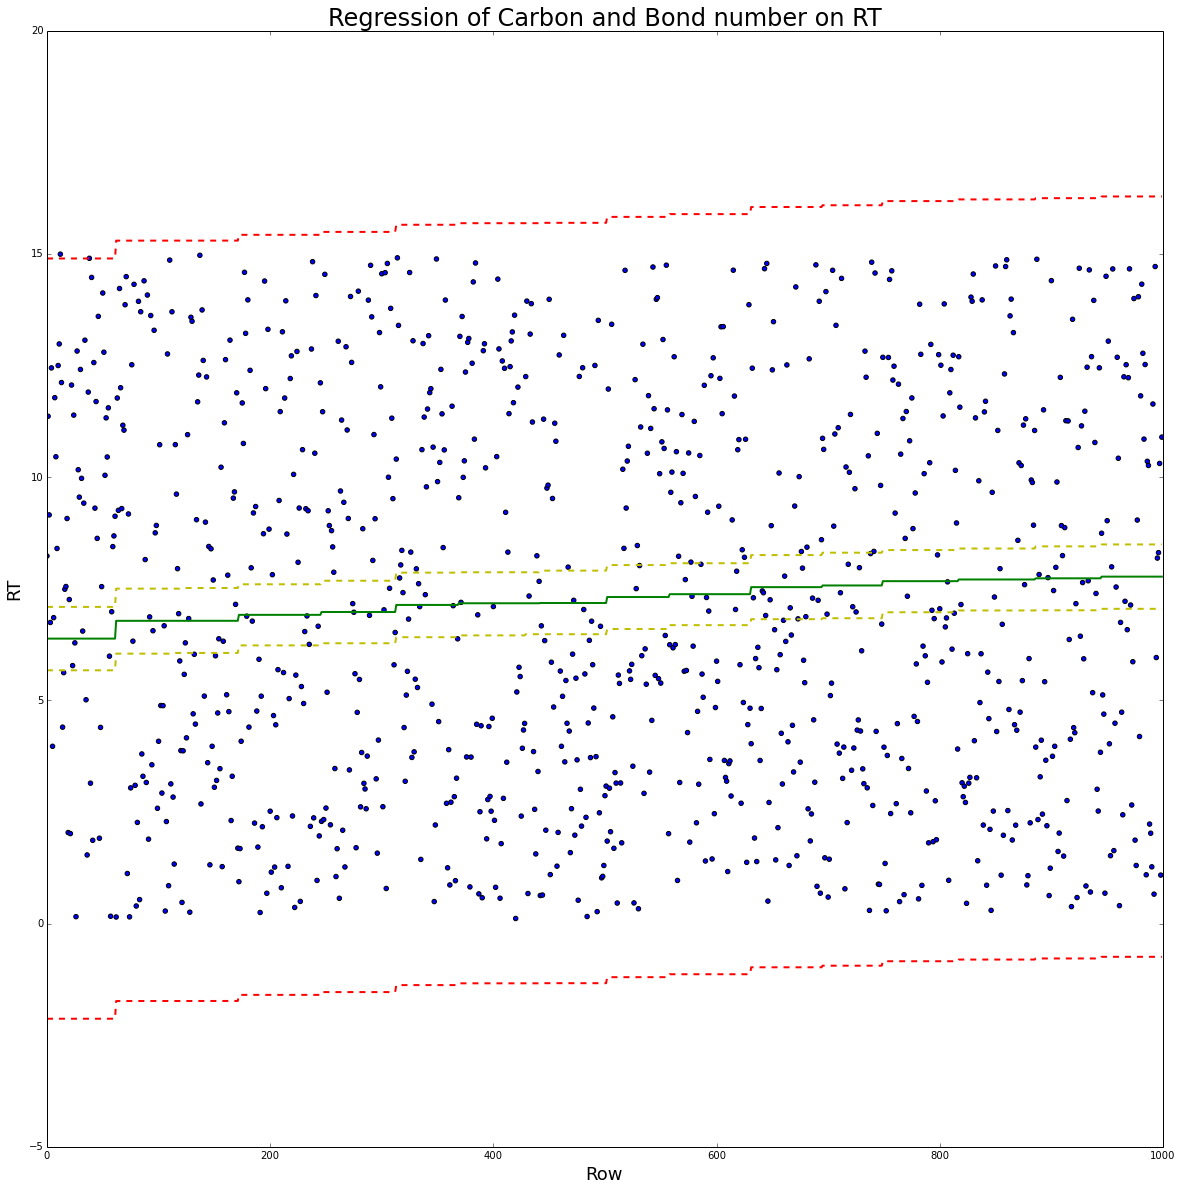

In [140]:
# Make Figure with only 1 plot
fig, ax = plt.subplots(1, 1, figsize=(20,20))

# Plot original data
ax.scatter(x, y)

# Plot fitted data and confidence regions
ax.plot(x, fittedvalues, 'g-', lw=2)
ax.plot(x, predHi, 'r--', lw=2)
ax.plot(x, predLow, 'r--', lw=2)
ax.plot(x, ciHi, 'y--', lw=2)
ax.plot(x, ciLow, 'y--', lw=2)

# Adjust plot to make it look a little better
ax.set_xlabel('Row', fontsize=18)
ax.set_ylabel('RT', fontsize=18)
ax.set_title('Regression of Carbon and Bond number on RT', fontsize=24)
ax.set_xlim(0, 1000)

The plot above shows the following. Remember this is simulated data, so it looks a little strange.

1. Blue dots are the original data points
2. Green line is the fitted regression line
3. Yellow lines are the confidence interval
4. Red lines are the prediction interval (**You want this**)

## Output other outlier stats

There are two additional outlier stats that we have not grabbed yet. I will get them here, I will also get cook's D again, just to show that you can get it this way too.

In [141]:
infl = results.get_influence()

In [142]:
dir(infl)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'resid_press',
 'resid_std',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'sigma2_not_obsi',
 'sigma_est',
 'summary_frame',
 'summary_table']

In [143]:
# Cook's D stat (same as above method)
cooksD = infl.cooks_distance

# PRESS residuals
press = infl.resid_press

# DFFITS provides the value and the cutoff threshold
(dffits, dffitsThres) = infl.dffits

# Flag DFFITS if greater than threshold
flagDffits = dffits > dffitsThres

In [144]:
# Make pretty table for everything
pretty = pd.DataFrame({
        'cooksD': cooksD[0],
        'dffits': dffits,
        'dffits thresh': [dffitsThres]*1000,
        'flag_dffits': flagDffits.astype(int),
        'press resid': press
    })

pretty.head()

,cooksD,dffits,dffits thresh,flag_dffits,press resid
0,1.436874e-05,0.010024,0.167332,0,0.530199
1,9.966226e-04,0.083527,0.167332,0,4.477744
2,1.150753e-04,0.028369,0.167332,0,1.494187
3,8.022586e-08,-0.000749,0.167332,0,-0.037390
4,1.438928e-03,0.100387,0.167332,0,5.307651
